In [1]:
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog
import pandas as pd
from pandas.api.types import is_string_dtype
import csv, json
import numpy as np
import re
from tkinter.messagebox import showinfo, showwarning
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#FUNCTIONS:

# function to show output in output window:

def show_output(text):
    output_window.delete(0.0, tk.END)
    output_window.insert(tk.END, text)

#FUNCTIONS TO LOAD AND CONVERT CSV_FILE TO JSON_FILE:

# convert csv file to json file
def convert_cvs_to_json(csvFilePath):
    data = {}
    df = pd.read_csv(csvFilePath)
    head = df.columns[0]
    jsonFilePath = csvFilePath[:-4]+".json"
    show_output(jsonFilePath)
    with open (csvFilePath, encoding='utf-8-sig') as csvFile:
        csvReader = csv.DictReader(csvFile)
        for csvRow in csvReader:
            data[csvRow[head]] = csvRow

    with open(jsonFilePath, 'w') as jsonFile:
        jsonFile.write(json.dumps(data, indent = 4))

# load csv file (for converting into a Json file):
def UploadAction1(event = None):
    filename = filedialog.askopenfilename()
    print("Select:", filename)
    show_output(filename)
    convert_cvs_to_json(filename)        

# FUNCTIONS FOR LOADING, CLEANING, AND SAVING CLEANED FILE:

# FUNCTION FOR CLEANING FILE & SAFE THE CLEANED FILE INTO A NEW FILE WITH A NAME GIVEN  
# BY ADDING "_PREPARED" TO THE END OF THE INITIAL FILE NAME

def cleanfile(initialFileName):
    df = pd.read_csv(initialFileName)
    #print(len(df)) 
    
    df = df.dropna(how = 'all') # filtering out missing data
    
    df.columns = df.columns.str.upper()  # change all columns name to upper case
    
   # print(len(df))
    for col in df.columns:
        
        if (is_string_dtype(df[col])):
            df[col]= df[col].str.strip('#')  # remove unneccessary '#'character from both sides of string in df
            df[col]= df[col].str.strip()   # remove white space from both sides of string in DF
            
        if col == 'PROGRAM STATUS':
            active = df['PROGRAM STATUS'] =='ACTIVE' # Remove vendors with program status of inactive
            df = df.loc[active]
            
        if col == 'VIOLATION  STATUS':    #remove extra white space between words in column 'VIOLATION STATUS'
            df.rename(columns = {'VIOLATION  STATUS':'VIOLATION STATUS'}, inplace = True) 
            
        # Extract the grey part of col PE DESCRIPTION into another column (column: SEAT) :
        if col =='PE DESCRIPTION':
            df['SEAT'] = df[col].apply(lambda x: get_seat(x))
            df[col] = df[col].apply(lambda x: get_seat2(x)) # Retain the rest in col PE DESCRIPTION
    
    #print(len(df))
    #df = df.reset_index(drop = True, inplace = True) # reset index after filtering
   
    #print(len(df))
    outputFilename = initialFileName[:-4]+"_PREPARED.csv" # creating a name for the cleaned file
    show_output(outputFilename)
    print(outputFilename)
    # SAVING FILE AFTER CLEANING (FOR BACK-UP PURPOSE)
    df.to_csv(outputFilename)
    

    print(df.head(20))


# Function for extracting the grey part of col PE DESCRIPTION into another col:
def get_seat (seat):
    x = seat.split('(')
    if len(x) > 1: 
        return "(" + seat.split('(')[1].split(')')[0] + ")"
    else: 
        return 'NaN'


# Function for retaining the rest of col PE DESCRIPTION:
def get_seat2 (seat):
    x = seat.split('(')
    if len(x) > 1: 
        return re.sub("\(\d+\-\d+\)"," ",seat)
    else: 
        return 'NaN'
    
# FUNCTION FOR LOADING CSV FILE (for cleaning file and saving prepared file):
    
def UploadAction2(event = None):
    filename = filedialog.askopenfilename()
    print("Select:", filename)
    #show_output(filename)
    cleanfile(filename)
    
# FUNCTION FOR LOADING PREPARED FILE 

def UploadActionPreparedFile(event = None):
    global df_prepared

    filename = filedialog.askopenfilename()
    show_output(filename)
    if filename:
        if (filename[-13:] != "_PREPARED.csv"):
            showwarning("WARNING", "Need to load the PREPARED INSPECTION file")
        else: 
            df_prepared = pd.read_csv(filename)
            showinfo("INFO", "DataFrame from the prepared inspection data created! ")

def UploadActionPreparedFile2(event = None):
    global df_prepared2

    filename = filedialog.askopenfilename()
    show_output(filename)
    
    if filename:
        if (filename[-13:] != "_PREPARED.csv"):
            showwarning("WARNING", "Load the PREPARED VIOLATION file")
        else: 
            df_prepared2 = pd.read_csv(filename)
            showinfo("INFO", "DataFrame from the prepared violation data created! ")

    
# INSPECTION SCORE PER YEAR FOR EACH ZIP CODE:

# calculating mean of inspection score per year for each zip code:
def mean_score_per_year_zipcode():
    global df_prepared
    
    if df_prepared is None:
        #print("You need to read prepared file first")
        showwarning("WARNING", "Load the Inspection_PREPARED.CSV file first!")
    
    else:  
        # Turn activity date to date/time object in python:
        df_prepared['ACTIVITY DATE'] = pd.to_datetime(df_prepared['ACTIVITY DATE'])
        df_prepared['YEAR'] = df_prepared['ACTIVITY DATE'].dt.year  # creating "YEAR" column:

        #Inspection score per year for each zip code: 
        grouped1= df_prepared["SCORE"].groupby([df_prepared['YEAR'],df_prepared['ZIP CODES']])
        print(grouped1.mean()) # mean for the inspection score per year for each zip codes

# calculating median of inspection score per year for each zip code:
def median_score_per_year_zipcode():
    global df_prepared
    
    if df_prepared is None:
        #print("You need to read prepared file first")
        showwarning("WARNING", "Load the Inspection_PREPARED.CSV file first!")
    
    else:  
        # Turn activity date to date/time object in python:
        df_prepared['ACTIVITY DATE'] = pd.to_datetime(df_prepared['ACTIVITY DATE'])
        df_prepared['YEAR'] = df_prepared['ACTIVITY DATE'].dt.year  # creating "YEAR" column:

        #Inspection score per year for each zip code: 
        grouped1= df_prepared["SCORE"].groupby([df_prepared['YEAR'],df_prepared['ZIP CODES']])
        print(grouped1.median()) # median for the inspection score per year for each zip codes
        
# calculating mode of inspection score per year for each zip code:
def mode_score_per_year_zipcode():
    global df_prepared
    
    if df_prepared is None:
        #print("You need to read prepared file first")
        showwarning("WARNING", "Load the Inspection_PREPARED.CSV file first!")
    
    else:  
        # Turn activity date to date/time object in python:
        df_prepared['ACTIVITY DATE'] = pd.to_datetime(df_prepared['ACTIVITY DATE'])
        df_prepared['YEAR'] = df_prepared['ACTIVITY DATE'].dt.year  # creating "YEAR" column:

        #Inspection score per year for each zip code: 
        grouped1= df_prepared["SCORE"].groupby([df_prepared['YEAR'],df_prepared['ZIP CODES']])
        print(grouped1.agg(pd.Series.mode).to_frame()) # mode for the inspection score per year for each zip codes
        

# INSPECTION SCORE PER YEAR FOR EACH TYPE OF VENDOR'S SEATING:

# calculating mean of inspection score per year for each type of vendor's seating:
def mean_score_per_year_seat():
    global df_prepared
    
    if df_prepared is None:
        #print("You need to read prepared file first")
        showwarning("WARNING", "Load the Inspection_PREPARED.CSV file first!")
    
    else:  
        # Turn activity date to date/time object in python:
        df_prepared['ACTIVITY DATE'] = pd.to_datetime(df_prepared['ACTIVITY DATE'])
        df_prepared['YEAR'] = df_prepared['ACTIVITY DATE'].dt.year  # creating "YEAR" column:

        #Inspection score per year for each zip code: 
        grouped2= df_prepared["SCORE"].groupby([df_prepared['YEAR'],df_prepared['SEAT']])
        print(grouped2.mean()) # mean for the inspection score per year for each vendor's seating

# calculating median of inspection score per year for each vendor's seating:
def median_score_per_year_seat():
    global df_prepared
    
    if df_prepared is None:
        #print("You need to read prepared file first")
        showwarning("WARNING", "Load the Inspection_PREPARED.CSV file first!")
    
    else:  
        # Turn activity date to date/time object in python:
        df_prepared['ACTIVITY DATE'] = pd.to_datetime(df_prepared['ACTIVITY DATE'])
        df_prepared['YEAR'] = df_prepared['ACTIVITY DATE'].dt.year  # creating "YEAR" column:

        #Inspection score per year for each zip code: 
        grouped2= df_prepared["SCORE"].groupby([df_prepared['YEAR'],df_prepared['SEAT']])
        print(grouped2.median()) # median for the inspection score per year for vendor's seating
        
# calculating mode of inspection score per year for each vendor's seating:
def mode_score_per_year_seat():
    global df_prepared
    
    if df_prepared is None:
        #print("You need to read prepared file first")
        showwarning("WARNING", "Load the Inspection_PREPARED.CSV file first!")
    
    else:  
        # Turn activity date to date/time object in python:
        df_prepared['ACTIVITY DATE'] = pd.to_datetime(df_prepared['ACTIVITY DATE'])
        df_prepared['YEAR'] = df_prepared['ACTIVITY DATE'].dt.year  # creating "YEAR" column:

        #Inspection score per year for each zip code: 
        grouped2= df_prepared["SCORE"].groupby([df_prepared['YEAR'],df_prepared['SEAT']])
        print(grouped2.agg(pd.Series.mode).to_frame()) # mode for the inspection score per year for each zip codes
        
def graph_violations_type(): 
    global df_prepared
    global df_prepared2

    if (df_prepared is None) or (df_prepared2 is None):
        #print("You need to read prepared inspection and prepared violation files first")
        showwarning("WARNING", "Load both Inspection_PREPARED.CSV and Violation_PREPARED.CSV files first!")
        
    else:  
        # merge 2 dataSet 1 &3 , keep 1:
        df_new = pd.merge(df_prepared, df_prepared2, on = "SERIAL NUMBER")

        df_new['grouped code'] = df_new['VIOLATION CODE'] # creating new column (copy of column'VIOLATION CODE')

        df_new['grouped code'].replace(regex={r'^F00\d':'1',r'^F01\d':'2',r'^F02\d':'3',r'^F03\d':'4',r'^F04\d':'5',r'^F05\d':'6',r'^W\d+':'7',r'^MF\d+':'8',r'^H\d+':'9'}, inplace = True)
        df_new["grouped code"].replace(['7','8','9'],'6',inplace = True) # grouping 6,7,8,9 = 6

        # counting number of violations base on grouped code
        results = df_new["grouped code"].value_counts().sort_index()
        print(results)
        graph_it(results)
        
       # grouped_Val_Code = range(1,7)
       # plt.bar(grouped_Val_Code, results)
       # plt.xlabel('grouped types of violation')
       # plt.ylabel('number of violated establishment')
       # plt.show

def graph_it(results): 
    grouped_Val_Code = range(1,7)
    plt.bar(grouped_Val_Code, results)
    plt.xlabel('grouped types of violation')
    plt.ylabel('number of violated establishment')
    plt.show()

def graph_correlation(): 
    global df_prepared
    global df_prepared2

    if (df_prepared is None) or (df_prepared2 is None):
        #print("You need to read prepared inspection and prepared violation files first")
        showwarning("WARNING", "Load both Inspection_PREPARED.CSV and Violation_PREPARED.CSV files first!")
        
    else:  
        # merge 2 dataSet 1 &3 , keep 1:
        df_new = pd.merge(df_prepared, df_prepared2, on = 'SERIAL NUMBER')
        
        res = df_new.groupby(['ZIP CODES','FACILITY ID']).count()
        print(len(res))

        #SORT THE DATAFRAME BY THE MEAN OF THE NUMBER OF VIOLOATIONS PER FACILITY IN EACH ZIPCODE (IN ASCENDING ORDER)
        #group by Zip Codes
        grp = res.groupby('ZIP CODES')
    
        #Within each group, calculate the mean over'OWNER ID' 
        #(any other columne would be the same since they have the same values ) 
        # and broadcast the values using transform. Then sort by 'OWNER ID'
        sort1 = res.loc[grp[['OWNER ID']].transform(lambda x: x.mean()).sort_values('OWNER ID').index]

        # create a new column in the dataframe that gives x-values (indices) for the sorted data 
        #(for the purpose of calculating correlation 
        x_value = range(1,len(sort1)+1)

        sort1['x_value'] = x_value
        
        #Show the data on the number of violations per facility/vendor using scatter plot; 
        #From left to right, the mean in each zipcode is increasing  
        sns.regplot('x_value','VIOLATION CODE',data = sort1, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
        
        # Calculate correlation between the number of violations per facility/vendor with their zipcode, 
        #which was sorted in an ascending order of the average number of violoations in each zipcode 
        
        show_output("Correlation coefficient = " + str(sort1['x_value'].corr(sort1['VIOLATION CODE'])))
        print("Correlation coefficient = " + str(sort1['x_value'].corr(sort1['VIOLATION CODE'])))
        plt.show()


34071
Correlation coefficient = 0.188804625542713


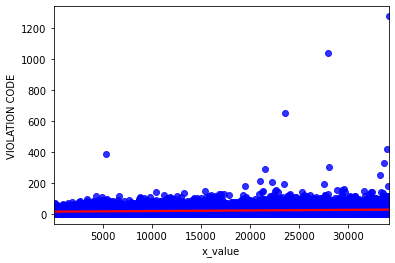

In [3]:
# main frame
root = tk.Tk()

root.title("SUMMATIVE ASSESSMENT")
root.geometry("800x500")

# Use as global variable to check if the prepared dataset has been loaded before doing calculations (e.g., mean, mode)
# for prepared inspection file 
df_prepared = None

# for prepared violation file 
df_prepared2 = None
# INITIAL DATASET:

#label for initial Dataset
label1 = tk.Label(root, text="Initial DataSet", font='none 14 bold',justify="left",anchor="w")
label1.grid(row=1, column=0, sticky="W")

#buttons:
load_and_clean_button = ttk.Button(root, text="Load, Clean and Save",command=UploadAction2)
load_and_clean_button.grid(row=3, column=0, sticky="W")

load_and_translate_button = ttk.Button(root, text="Translate to JSON",command=UploadAction1)
load_and_translate_button.grid(row=5, column=0, sticky="W")

# PREPARED DATASET:

#label for prepared Dataset:
label2 = tk.Label(root, text="Prepared DataSet", font='none 14 bold',justify="right",anchor="w")
label2.grid(row=1, column=4, columnspan=2, sticky="W")

#buttons:
load_button = ttk.Button(root, text="Load Inspection", command = UploadActionPreparedFile)
load_button.grid(row=3, column=4, sticky="W")

save_button = ttk.Button(root, text="Load Violation", command = UploadActionPreparedFile2) 
save_button.grid(row=5, column=4, sticky="W")

# OUTPUT OF DATA MANIPULATION:

# output1 (Inspection score per year for each zip code):

#label: 
label3 = tk.Label(root, text="Inspection score per year (for each zip code)",
                  font='none 14 bold',justify="left",anchor="w")
label3.grid(row=12, column=0,columnspan=5, sticky="W")

#buttons:
mean_button = ttk.Button(root, text="Mean", command = mean_score_per_year_zipcode) 
mean_button.grid(row=15, column=1, sticky="W")

mode_button = ttk.Button(root, text="Mode", command = mode_score_per_year_zipcode) 
mode_button.grid(row=15, column=3, sticky="W")

median_button = ttk.Button(root, text="Median", command = median_score_per_year_zipcode) 
median_button.grid(row=15, column=4, sticky="W")

# Output2 (Inspection score per year for each type of vendor's seating):

#label: 
label4 = tk.Label(root, text="Inspection score per year (for each type of vendor's seating)",
                  font='none 14 bold',justify="left",anchor="w")
label4.grid(row=22, column=0,columnspan=5, sticky="W")

#buttons:
mean_zc_button = ttk.Button(root, text="Mean", command = mean_score_per_year_seat) 
mean_zc_button.grid(row=25, column=1, sticky="W")

mode_zc_button = ttk.Button(root, text="Mode", command = mode_score_per_year_seat) 
mode_zc_button.grid(row=25, column=3, sticky="W")

median_zc_button = ttk.Button(root, text="Median", command = median_score_per_year_seat) 
median_zc_button.grid(row=25, column=4, sticky="W")


# Output 3 (VISUALIZATION):

#label: 
label5 = tk.Label(root, text="Visualisation: Number of establishment that have committed each type of violation",
                  font='none 14 bold',justify="left",anchor="w")
label5.grid(row=32, column=0,columnspan=5, sticky="W")

#buttons:
graph_button1 = ttk.Button(root, text="Bar plot", command = graph_violations_type)  
graph_button1.grid(row=35, column=1, sticky="W")
#graph_button1.pack()


# Output 4 (VISUALIZATION)

#label: 
label6 = tk.Label(root, text="Visualisation: Correlation between the number of violations committed per vendor and their zip code",
                  font='none 14 bold',justify="left",anchor="w")
label6.grid(row=42, column=0,columnspan=5, sticky="W")

#buttons:
graph_button2 = ttk.Button(root, text="Scatter plot and visualisation", command = graph_correlation)
graph_button2.grid(row=45, column=1, sticky="W")
#graph_button2.pack()




# output window area
output_label = tk.Label(root, text="Output:", font='none 12 bold')
output_label.grid(row=52, column=0, sticky="W")

output_window = tk.Text(root, width=80, height=5, wrap='word')
output_window.grid(row=55, column=0, columnspan=7)


root.mainloop()